# Naive Bayes on Dow Jones Industrial Average Historical Data

Dow Jones average is an average of stock prices calculated by Dow Jones & Company, Inc. 

In the United States, the averages are one of the most widely used gauges of broad trends in stock and bond prices. 

In 1896, Dow Jones & Company, a financial news publisher founded by Charles Henry Dow and Edward D. Jones, started generating a daily industrials average by dividing the total price of 12 companies by 12. 

Since then, the list of stocks has been expanded, and the divisor has been modified to account for stock splits, stock replacements, and major dividend adjustments. As a result, the averages are not arithmetical means, but rather averages intended to show broad market price patterns.

```Dataset:``` https://www.kaggle.com/mnassrib/dow-jones-industrial-average 

### Importing the required libraries!

1. importing numpy to perform various mathematcial operations on arrays.
2. importing pandas for performing data manipulation and analysis.
3. importing matplotlib to generate line plots,scatter plots,histogram.

In [1]:
# importing the libraries related to the data manipulation.
import numpy as np
import pandas as pd

# importing the libraries related to the data_visualization
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the Dataset!

In [2]:
# datapath = E:\DOWNLOADS\Dow Jones Industrial Average Historical Data.csv
Dow_Jones = pd.read_csv(r'E:\DOWNLOADS\Dow Jones Industrial Average Historical Data.csv',index_col=0,parse_dates=['Date'])
Dow_Jones

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-12-31,"28,538.44","28,414.64","28,547.35","28,376.49",193.34M,0.27%
2019-12-30,"28,462.14","28,654.76","28,664.69","28,428.98",185.07M,-0.64%
2019-12-27,"28,645.26","28,675.34","28,701.66","28,608.98",184.93M,0.08%
2019-12-26,"28,621.39","28,539.46","28,624.10","28,535.15",155.97M,0.37%
2019-12-24,"28,515.45","28,572.57","28,576.80","28,503.21",95.29M,-0.13%
...,...,...,...,...,...,...
2009-01-09,"8,599.18","8,738.80","8,800.45","8,541.75",-,-1.64%
2009-01-08,"8,742.46","8,769.94","8,807.14","8,593.52",-,-0.31%
2009-01-07,"8,769.70","8,996.94","8,996.94","8,690.45",-,-2.72%


In [3]:
# shape of the dataset
Dow_Jones.shape

(2766, 6)

In [4]:
# Find the information about the given DataFrame including the index dtype and column dtypes, non-null values and memory usage.
Dow_Jones.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2766 entries, 2019-12-31 to 2009-01-05
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Price     2766 non-null   object
 1   Open      2766 non-null   object
 2   High      2766 non-null   object
 3   Low       2766 non-null   object
 4   Vol.      2766 non-null   object
 5   Change %  2766 non-null   object
dtypes: object(6)
memory usage: 151.3+ KB


In [5]:
# finding the null values present in the given series of object.
Dow_Jones.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

There are no null or missing values present in the dataset

In [6]:
# Replacing the Price Column of the dataset 
Dow_Jones['Price'] = Dow_Jones['Price'].apply(lambda x: x.replace(',',''))

# Replacing the Open Column of the dataset 
Dow_Jones['Open'] = Dow_Jones['Open'].apply(lambda x: x.replace(',',''))

# Replacing the High Column of the dataset 
Dow_Jones['High'] = Dow_Jones['High'].apply(lambda x: x.replace(',',''))

# Replacing the Low Column of the dataset 
Dow_Jones['Low'] =Dow_Jones['Low'].apply(lambda x: x.replace(',',''))

As we know that, in the dataframe the ```Dow_Jones[Vol.]``` has the values in form of ```str```, so we will be converting ```str format``` to the ```float format``` for further analysis

In [7]:
# Spliting the Vol. Feature Eg. 193.4M to 193.4
Dow_Jones['Vol.'] = Dow_Jones['Vol.'].str.split("M", n = 1, expand = True)

In [8]:
# Replacing the null values to Zero
Dow_Jones['Vol.'] = Dow_Jones['Vol.'].replace(to_replace =["-"], value = 0)

In [9]:
Dow_Jones

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-12-31,28538.44,28414.64,28547.35,28376.49,193.34,0.27%
2019-12-30,28462.14,28654.76,28664.69,28428.98,185.07,-0.64%
2019-12-27,28645.26,28675.34,28701.66,28608.98,184.93,0.08%
2019-12-26,28621.39,28539.46,28624.10,28535.15,155.97,0.37%
2019-12-24,28515.45,28572.57,28576.80,28503.21,95.29,-0.13%
...,...,...,...,...,...,...
2009-01-09,8599.18,8738.80,8800.45,8541.75,0,-1.64%
2009-01-08,8742.46,8769.94,8807.14,8593.52,0,-0.31%
2009-01-07,8769.70,8996.94,8996.94,8690.45,0,-2.72%


In [10]:
# Conerting the format of the Price Column from object <--> Float
Dow_Jones['Price'] = Dow_Jones['Price'].astype(float)

# Conerting the format of the Open Column from object <--> Float
Dow_Jones['Open'] = Dow_Jones['Open'].astype(float)

# Conerting the format of the High Column from object <--> Float
Dow_Jones['High'] = Dow_Jones['High'].astype(float)

# Conerting the format of the low Column from object <--> Float
Dow_Jones['Low'] = Dow_Jones['Low'].astype(float)

# Conerting the format of the Vol Column from object <--> float
Dow_Jones['Vol.'] = Dow_Jones['Vol.'].astype(float)

# Conerting the format of the Change% Column from object <--> str
Dow_Jones['Change %'] = Dow_Jones['Change %'].astype(str)

In [11]:
Dow_Jones.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2766 entries, 2019-12-31 to 2009-01-05
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     2766 non-null   float64
 1   Open      2766 non-null   float64
 2   High      2766 non-null   float64
 3   Low       2766 non-null   float64
 4   Vol.      2766 non-null   float64
 5   Change %  2766 non-null   object 
dtypes: float64(5), object(1)
memory usage: 151.3+ KB


In [12]:
# Pandas describe() is used to view some basic statistical details like percentile, mean, std etc 
Dow_Jones.describe()

,Price,Open,High,Low,Vol.
count,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000
mean,16817.204516,16812.318735,16904.069855,16717.879740,165.163561
std,5519.217085,5520.507472,5523.934537,5513.883962,121.479160
min,6547.050000,6547.010000,6758.440000,6440.080000,0.000000
25%,12274.697500,12272.472500,12344.670000,12185.120000,86.642500
50%,16460.535000,16459.510000,16529.430000,16378.705000,131.060000
75%,20808.950000,20815.085000,20850.040000,20731.360000,244.907500
max,28645.260000,28675.340000,28701.660000,28608.980000,900.510000


,Price,Open,High,Low,Vol.
Price,1.000000,0.999680,0.999840,0.999865,0.666921
Open,0.999680,1.000000,0.999870,0.999793,0.668501
High,0.999840,0.999870,1.000000,0.999762,0.670363
Low,0.999865,0.999793,0.999762,1.000000,0.664709
Vol.,0.666921,0.668501,0.670363,0.664709,1.000000


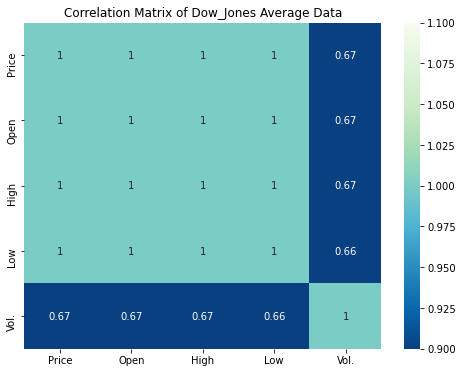

In [13]:
Dow_Jones_correlation = Dow_Jones.corr()

plt.figure(figsize=(8,6))
sns.heatmap(Dow_Jones_correlation,annot = True,vmin =1,vmax=1,cmap ='GnBu_r')
plt.title("Correlation Matrix of Dow_Jones Average Data")
Dow_Jones_correlation

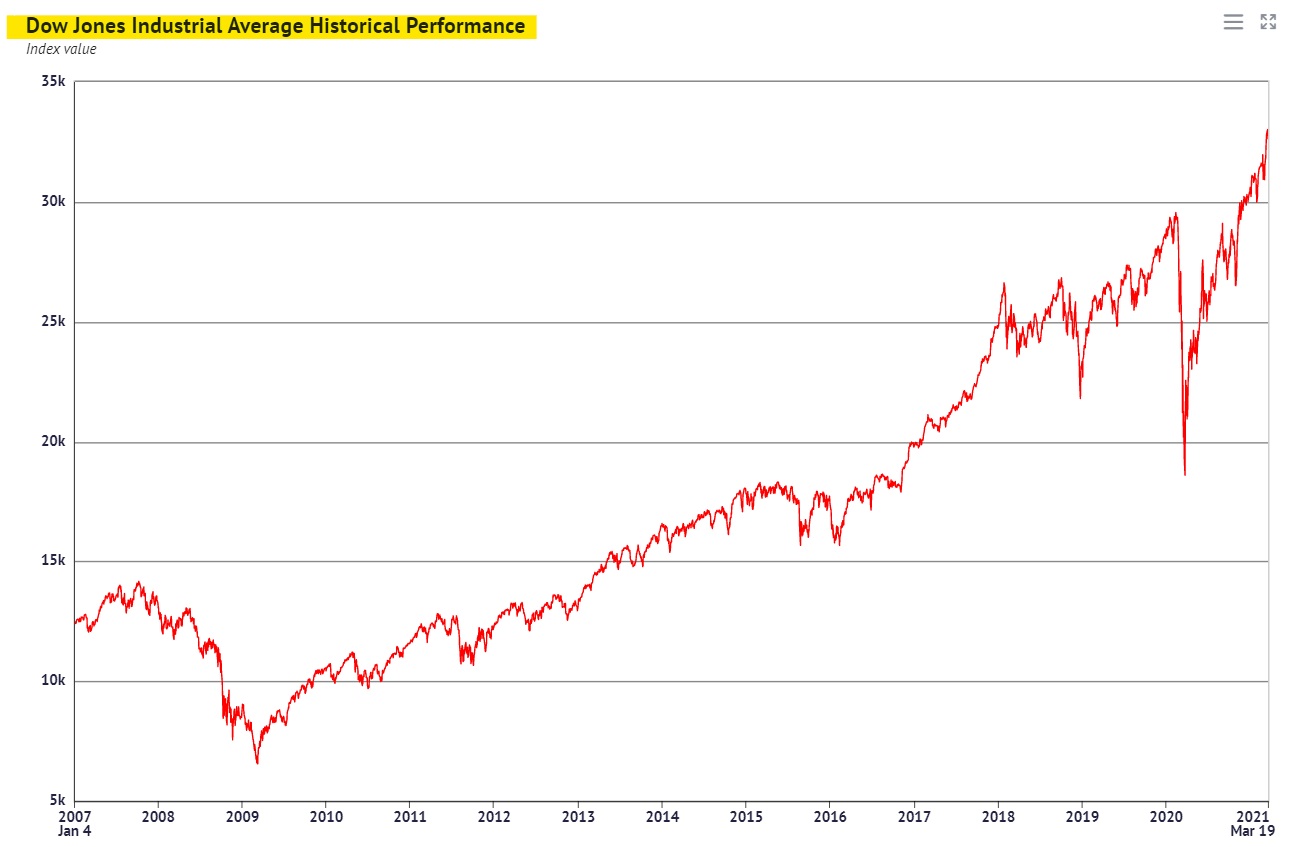

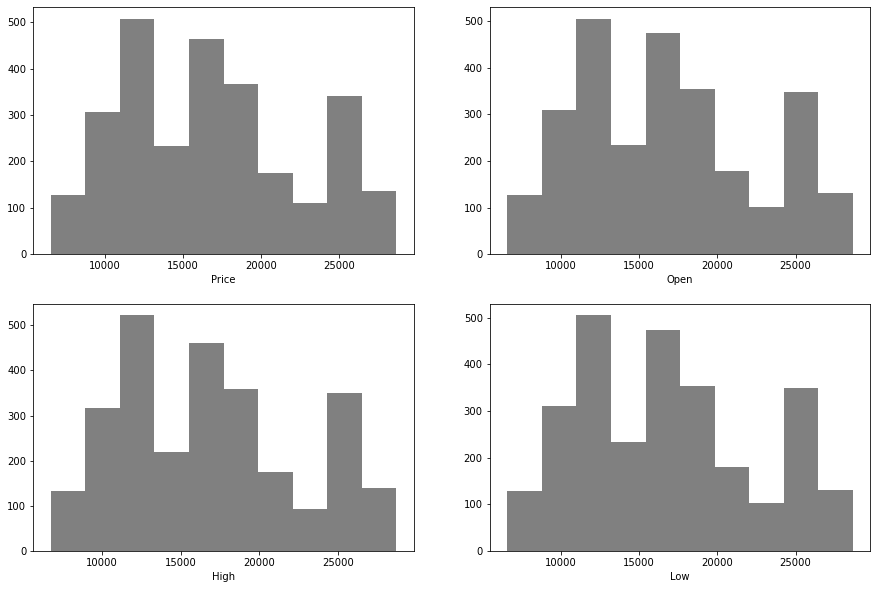

In [14]:
fig = plt.figure()

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# Price
ax1.hist(Dow_Jones['Price'], color = 'grey')
ax1.set_xlabel('Price')

# Open
ax2.hist(Dow_Jones['Open'], color = 'grey')
ax2.set_xlabel('Open')

# High
ax3.hist(Dow_Jones['High'], color = 'grey')
ax3.set_xlabel('High')

# low
ax4.hist(Dow_Jones['Open'], color = 'grey')
ax4.set_xlabel('Low')

fig.set_figheight(10)
fig.set_figwidth(15)

plt.show()

Text(0.5, 1.0, 'Relation between Price and open')

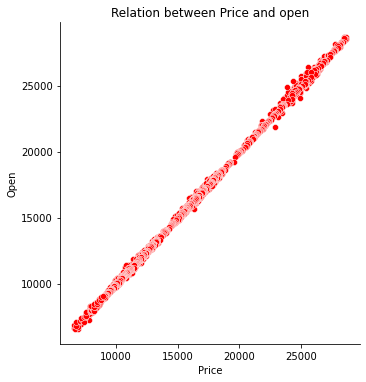

In [15]:
sns.relplot(x = Dow_Jones['Price'], y = Dow_Jones['Open'], data=Dow_Jones, color = 'red')
plt.title('Relation between Price and open')

## Model Prediction:

### Naive Bayes Algorithm:

Naive Bayes is among one of the most simple and powerful algorithms for classification based on Bayes’ Theorem with an assumption of independence among predictors. 

There are two parts to this algorithm:

1. Naive
2. Bayes

Bayes Theorem provides a way that we can calculate the probability of a piece of data belonging to a given class, given our prior knowledge. Bayes’ Theorem is stated as:

```P(class|data) = (P(data|class) * P(class)) / P(data)```

Where P(class|data) is the probability of class given the provided data.

### Importing the required Libraries

In [16]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [17]:
Dow_Jones

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-12-31,28538.44,28414.64,28547.35,28376.49,193.34,0.27%
2019-12-30,28462.14,28654.76,28664.69,28428.98,185.07,-0.64%
2019-12-27,28645.26,28675.34,28701.66,28608.98,184.93,0.08%
2019-12-26,28621.39,28539.46,28624.10,28535.15,155.97,0.37%
2019-12-24,28515.45,28572.57,28576.80,28503.21,95.29,-0.13%
...,...,...,...,...,...,...
2009-01-09,8599.18,8738.80,8800.45,8541.75,0.00,-1.64%
2009-01-08,8742.46,8769.94,8807.14,8593.52,0.00,-0.31%
2009-01-07,8769.70,8996.94,8996.94,8690.45,0.00,-2.72%


The ```Dow_Jones['Change %']``` has the values in terms of percentage, so will be converting it and create a new feature called label:
    
   1. If the Price feature is ```greater``` than the Open feature, then will be labelling it as 1.
   2. If the Price feature is ```smaller``` than the Open feature, then will be labelling it as 0.
    

In [18]:
Dow_Jones.loc[Dow_Jones['Price']>Dow_Jones['Open'],'Label'] = 1
Dow_Jones.loc[Dow_Jones['Price']<Dow_Jones['Open'],'Label'] = 0

In [19]:
Dow_Jones

,Price,Open,High,Low,Vol.,Change %,Label
Date,,,,,,,
2019-12-31,28538.44,28414.64,28547.35,28376.49,193.34,0.27%,1.0
2019-12-30,28462.14,28654.76,28664.69,28428.98,185.07,-0.64%,0.0
2019-12-27,28645.26,28675.34,28701.66,28608.98,184.93,0.08%,0.0
2019-12-26,28621.39,28539.46,28624.10,28535.15,155.97,0.37%,1.0
2019-12-24,28515.45,28572.57,28576.80,28503.21,95.29,-0.13%,0.0
...,...,...,...,...,...,...,...
2009-01-09,8599.18,8738.80,8800.45,8541.75,0.00,-1.64%,0.0
2009-01-08,8742.46,8769.94,8807.14,8593.52,0.00,-0.31%,0.0
2009-01-07,8769.70,8996.94,8996.94,8690.45,0.00,-2.72%,0.0


In [20]:
Dow_Jones.dropna(inplace=True)

In [21]:
# In this step, we assign the independent variable(X) and the dependent variable (y)

# x = Dow_Jones['Open','Low','High','Vol']
X = Dow_Jones[['Open','High','Low','Vol.']]

# y = Dow_Jones['Label']
y = Dow_Jones['Label']

In [22]:
# printing the X feature
print(X)

                Open      High       Low    Vol.
Date                                            
2019-12-31  28414.64  28547.35  28376.49  193.34
2019-12-30  28654.76  28664.69  28428.98  185.07
2019-12-27  28675.34  28701.66  28608.98  184.93
2019-12-26  28539.46  28624.10  28535.15  155.97
2019-12-24  28572.57  28576.80  28503.21   95.29
...              ...       ...       ...     ...
2009-01-09   8738.80   8800.45   8541.75    0.00
2009-01-08   8769.94   8807.14   8593.52    0.00
2009-01-07   8996.94   8996.94   8690.45    0.00
2009-01-06   8954.57   9175.19   8868.07    0.00
2009-01-05   9027.13   9093.47   8841.70    0.00

[2765 rows x 4 columns]


In [23]:
# printing the y feature
print(y)

Date
2019-12-31    1.0
2019-12-30    0.0
2019-12-27    0.0
2019-12-26    1.0
2019-12-24    0.0
             ... 
2009-01-09    0.0
2009-01-08    0.0
2009-01-07    0.0
2009-01-06    1.0
2009-01-05    0.0
Name: Label, Length: 2765, dtype: float64


In [24]:
# Checking if there are any null values present 
X.isnull().sum()

Open    0
High    0
Low     0
Vol.    0
dtype: int64

In [25]:
X.dropna(inplace=True)

In [26]:
X

,Open,High,Low,Vol.
Date,,,,
2019-12-31,28414.64,28547.35,28376.49,193.34
2019-12-30,28654.76,28664.69,28428.98,185.07
2019-12-27,28675.34,28701.66,28608.98,184.93
2019-12-26,28539.46,28624.10,28535.15,155.97
2019-12-24,28572.57,28576.80,28503.21,95.29
...,...,...,...,...
2009-01-09,8738.80,8800.45,8541.75,0.00
2009-01-08,8769.94,8807.14,8593.52,0.00
2009-01-07,8996.94,8996.94,8690.45,0.00


In [27]:
y.isnull().sum()

0

In [28]:
y.dropna(inplace=True)

In [29]:
y

Date
2019-12-31    1.0
2019-12-30    0.0
2019-12-27    0.0
2019-12-26    1.0
2019-12-24    0.0
             ... 
2009-01-09    0.0
2009-01-08    0.0
2009-01-07    0.0
2009-01-06    1.0
2009-01-05    0.0
Name: Label, Length: 2765, dtype: float64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [31]:
#Create a Gaussian Classifier
model = GaussianNB()

In [32]:
model.fit(X_train,y_train)

GaussianNB()

In [35]:
Y_pred = model.predict(X_test)

In [36]:
#Choice of metrics influences how the performance of machine learning algorithms is measured and compared.
from sklearn import metrics

# calculating the mean absolute error
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test, Y_pred))

# calculating the mean squared error
print('Mean Squared Error :', metrics.mean_squared_error(y_test, Y_pred))

# calculating the root mean squared error
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))

Mean Absolute Error : 0.45207956600361665
Mean Squared Error : 0.45207956600361665
Root Mean Squared Error : 0.6723686236013818


In [37]:
# Calculate the absolute errors
errors = abs(Y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy= 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.45 degrees.
Accuracy: -inf %.


In [38]:
from sklearn.metrics import r2_score
r2_score(y_test, Y_pred)

-0.8238305057914042

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,Y_pred)

0.5479204339963833

Using the ```Navie Bayes Algorithm``` we have achieved an accuracy of approximately 55% which is not satisfying. 

### Comparing the  Actual values vs Predicted Values

In [40]:
result = pd.DataFrame({'Actual' : y_test , 'Predicted' : 
                       Y_pred}).reset_index()[['Actual' , 'Predicted']]
result

,Actual,Predicted
0,1.0,1.0
1,0.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
548,1.0,1.0
549,1.0,1.0
550,0.0,1.0
551,0.0,1.0


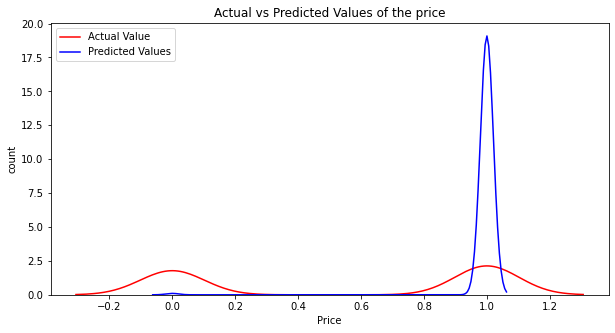

In [41]:
# plotting a distrubution plot for comparing the actual and the predicted values

plt.figure(figsize=(10, 5))
ax = sns.distplot(y, hist=False, bins=100, color="red", label ='Actual Value')
sns.distplot(Y_pred, hist=False, bins=100, color="blue", label ='Predicted Values' , ax=ax)
plt.xlabel('Price')
plt.ylabel('count')
plt.title('Actual vs Predicted Values of the price')
plt.legend()
plt.show()
plt.close()

#### Conclusion:

This complete notebook represents an Exploratory Data Analysis (EDA) process to show broad market price patterns. We have dealt with the  data ```Dow Jones Industrial Average Historical Data```. The purpose of this study is to analyze the dataset and obtain important insights form it. As visual representations are flexible and easy to understand, the results or outputs produced in the form of graphs can help people comprehend the current situation insights easily. The dataset used may not be an updated version; hence the inferences may vary from time to time as graphs can be generated as the data increases. As the amount of data increases, the trends may change and lead to different inferences and solutions. As the data was insufficient, the accuracy of the model was not upto the mark. We can use Support Vector Machine Algorithm, K-Nearest Neighbor algorithm as the accuracy of the Naive Bayes model was not Satisfactory. So we further need to decide to choose any other  model which provides better accuracy.